# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv
from scipy import stats as st
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

import warnings

Отключим оповещения

In [3]:
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

Зададим константы, которые будем использовать во всём проекте.

In [4]:
RANDOM_STATE = 42

## 1. Загрузка и подготовка данных

### 1.1. Загрузим данные из файлов в переменные

Добавим все датафреймы в список для дальнейшей работы с ними

In [6]:
data_train.name = 'Train'
data_test.name = 'Test'
data_full.name = 'Full'
df_list=[data_train, data_test, data_full]

### 1.2. Посмотрим основную информацию о датафреймах, воспользуемся функцией и библиотекой sweetviz

In [7]:
def show_main_info (df):
    print(df.name)
    display(df.head())
    # display(df.describe(include = 'all'))
    display(df.describe())
    display(df.corr())
    display(df.info())
    print('\nДубликатов:', df.duplicated().sum())
    print('\nПропущенные значения:')
    display(df.isna().sum().sort_values(ascending=False))
    df.hist(figsize=(15, 120), bins=50, layout=(86,4));
    print('\n\n---------------------------------------------------------------------\n')

Train


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.concentrate_ag,1.000000,0.021110,0.351985,-0.104934,0.133238,0.289552,-0.099818,0.045896,0.193935,0.015923,...,0.041765,0.169538,0.020832,0.005319,0.013019,0.228753,0.021660,0.199048,0.170298,0.061009
final.output.concentrate_pb,0.021110,1.000000,-0.008451,0.320916,0.095000,-0.100616,0.240650,0.068287,0.029186,0.124170,...,-0.001365,-0.035219,0.092632,0.069315,0.095147,-0.096191,0.123765,-0.115190,-0.018740,0.075302
final.output.concentrate_sol,0.351985,-0.008451,1.000000,0.217363,0.249632,0.225460,0.259185,-0.023407,0.244294,0.343058,...,-0.007337,0.268279,0.032091,0.134591,0.031137,0.246817,0.015942,0.234651,0.228520,-0.276807
final.output.concentrate_au,-0.104934,0.320916,0.217363,1.000000,0.253067,0.079619,0.067949,0.098396,-0.070600,0.108014,...,0.035814,-0.042100,0.002307,-0.011165,0.005808,-0.098015,-0.014616,-0.086371,-0.123644,-0.030628
final.output.recovery,0.133238,0.095000,0.249632,0.253067,1.000000,0.151610,-0.151287,-0.088242,-0.435553,0.398307,...,0.207745,0.057454,0.170838,-0.088934,0.098267,0.024196,0.068331,0.043838,-0.027593,-0.035658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,0.228753,-0.096191,0.246817,-0.098015,0.024196,-0.008345,0.066600,-0.085835,0.116366,-0.031146,...,0.105263,0.790037,0.013033,0.554604,0.083423,1.000000,0.036557,0.884422,0.512286,0.379832
secondary_cleaner.state.floatbank5_b_air,0.021660,0.123765,0.015942,-0.014616,0.068331,0.008731,0.216899,-0.133159,-0.104743,-0.000789,...,0.723039,0.244762,0.878027,0.153923,0.892482,0.036557,1.000000,0.046352,0.474619,-0.025908
secondary_cleaner.state.floatbank5_b_level,0.199048,-0.115190,0.234651,-0.086371,0.043838,-0.000398,0.075721,-0.104591,0.101261,-0.022692,...,0.110727,0.747276,0.035808,0.515643,0.100697,0.884422,0.046352,1.000000,0.493110,0.342094
secondary_cleaner.state.floatbank6_a_air,0.170298,-0.018740,0.228520,-0.123644,-0.027593,-0.103898,0.072273,0.001968,0.068385,-0.106076,...,0.205628,0.566670,0.311765,0.271796,0.440929,0.512286,0.474619,0.493110,1.000000,0.098643


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None


Дубликатов: 0

Пропущенные значения:


secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.output.concentrate_pb                  0
rougher.output.concentrate_au                  0
rougher.output.recovery                        0
rougher.output.tail_pb                         0
date                                           0
Length: 87, dtype: int64



---------------------------------------------------------------------

Test


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
primary_cleaner.input.sulfate,1.000000,0.455718,0.114456,0.497568,0.102653,0.048032,0.075737,0.138949,0.024710,0.027697,...,0.305793,0.117976,0.348395,0.068693,0.093608,0.132193,0.156583,0.072618,-0.134499,0.033945
primary_cleaner.input.depressant,0.455718,1.000000,0.215703,0.150760,0.144443,0.242592,0.148658,0.201499,0.036655,0.207632,...,0.326090,0.117510,0.238618,-0.085583,-0.090184,0.009138,0.064209,0.002988,-0.198422,0.034654
primary_cleaner.input.feed_size,0.114456,0.215703,1.000000,-0.291792,-0.064628,0.082869,-0.063490,0.071470,-0.091542,0.066384,...,-0.148328,-0.121148,-0.173658,-0.137180,-0.192880,-0.059167,-0.214970,-0.054173,0.026930,-0.083021
primary_cleaner.input.xanthate,0.497568,0.150760,-0.291792,1.000000,0.209017,-0.059553,0.153527,0.016144,0.044194,-0.078742,...,0.313377,0.131178,0.360961,0.121575,0.059162,0.128636,0.077380,0.095508,-0.218155,0.080662
primary_cleaner.state.floatbank8_a_air,0.102653,0.144443,-0.064628,0.209017,1.000000,0.121274,0.968679,-0.018713,0.814992,0.114058,...,0.469180,0.005962,0.476742,-0.058593,0.408050,0.271547,0.465492,0.161509,0.345231,0.172154
primary_cleaner.state.floatbank8_a_level,0.048032,0.242592,0.082869,-0.059553,0.121274,1.000000,0.101975,0.417515,-0.018378,0.784061,...,0.171716,0.096500,0.084418,-0.005819,-0.036132,0.164220,-0.012665,0.091263,-0.107710,0.076271
primary_cleaner.state.floatbank8_b_air,0.075737,0.148658,-0.063490,0.153527,0.968679,0.101975,1.000000,0.010220,0.862946,0.101127,...,0.483741,0.023801,0.487327,-0.080058,0.415343,0.260220,0.499829,0.155978,0.389594,0.187429
primary_cleaner.state.floatbank8_b_level,0.138949,0.201499,0.071470,0.016144,-0.018713,0.417515,0.010220,1.000000,-0.029228,0.406721,...,0.078411,0.216342,0.054902,-0.038440,-0.009671,0.029409,0.012115,0.004864,-0.006694,0.012904
primary_cleaner.state.floatbank8_c_air,0.024710,0.036655,-0.091542,0.044194,0.814992,-0.018378,0.862946,-0.029228,1.000000,0.003322,...,0.366373,0.047373,0.396029,-0.031081,0.400765,0.239333,0.500353,0.117465,0.490672,0.169634
primary_cleaner.state.floatbank8_c_level,0.027697,0.207632,0.066384,-0.078742,0.114058,0.784061,0.101127,0.406721,0.003322,1.000000,...,0.151945,0.093293,0.071559,-0.013814,-0.018878,0.143313,-0.004169,0.061153,-0.087866,0.067955


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None


Дубликатов: 0

Пропущенные значения:


rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank2_b_level     0
rougher.state.floatbank10_f_level              0
rougher.state.floatbank10_f_air                0
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank2_a_level     0
date                                           0
rougher.state.floatbank10_e_air                0
secondary_cleaner.state.floatbank3_b_air       0
secondary_cleaner.st



---------------------------------------------------------------------

Full


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.concentrate_ag,1.000000,0.063570,0.380142,-0.038373,0.185952,0.334596,-0.051855,0.028890,0.206569,0.071158,...,0.027343,0.104118,0.029887,-0.063246,-0.004246,0.184332,0.003693,0.156471,0.162591,0.059581
final.output.concentrate_pb,0.063570,1.000000,-0.048586,0.374400,0.151987,-0.126886,0.221372,0.094385,-0.047446,0.079160,...,0.058380,0.028962,0.115404,0.093859,0.125920,-0.024668,0.149266,-0.060038,-0.042372,0.067458
final.output.concentrate_sol,0.380142,-0.048586,1.000000,0.261225,0.265993,0.286305,0.221714,-0.023865,0.267781,0.316233,...,-0.049341,0.147304,0.020544,0.002077,-0.002361,0.163992,-0.009510,0.152343,0.245158,-0.216734
final.output.concentrate_au,-0.038373,0.374400,0.261225,1.000000,0.288568,0.080381,0.081291,0.134978,-0.031696,0.102781,...,0.008308,-0.019481,-0.015284,-0.018636,-0.000971,-0.080786,-0.016961,-0.084962,-0.082184,-0.019523
final.output.recovery,0.185952,0.151987,0.265993,0.288568,1.000000,0.125986,-0.143094,-0.050280,-0.409200,0.366954,...,0.167059,0.031317,0.158557,-0.049973,0.067014,0.011871,0.052017,0.016480,-0.025192,-0.005305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,0.184332,-0.024668,0.163992,-0.080786,0.011871,-0.021662,0.015060,-0.073670,0.035272,-0.098079,...,0.175689,0.737533,0.069865,0.417890,0.154722,1.000000,0.108107,0.818406,0.464142,0.344494
secondary_cleaner.state.floatbank5_b_air,0.003693,0.149266,-0.009510,-0.016961,0.052017,-0.013677,0.132744,-0.135330,-0.160522,-0.088879,...,0.734503,0.289059,0.855785,0.099747,0.895832,0.108107,1.000000,0.090751,0.491707,-0.011976
secondary_cleaner.state.floatbank5_b_level,0.156471,-0.060038,0.152343,-0.084962,0.016480,-0.003762,0.041558,-0.087635,0.063404,-0.054203,...,0.147999,0.630466,0.076251,0.364582,0.135991,0.818406,0.090751,1.000000,0.411510,0.327861
secondary_cleaner.state.floatbank6_a_air,0.162591,-0.042372,0.245158,-0.082184,-0.025192,-0.055311,0.007496,-0.070706,0.038797,-0.175804,...,0.229330,0.503967,0.311676,0.087389,0.473300,0.464142,0.491707,0.411510,1.000000,0.106270


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None


Дубликатов: 0

Пропущенные значения:


secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
                                            ... 
rougher.state.floatbank10_d_level              0
rougher.state.floatbank10_d_air                0
rougher.output.tail_pb                         0
rougher.output.tail_sol                        0
date                                           0
Length: 87, dtype: int64



---------------------------------------------------------------------



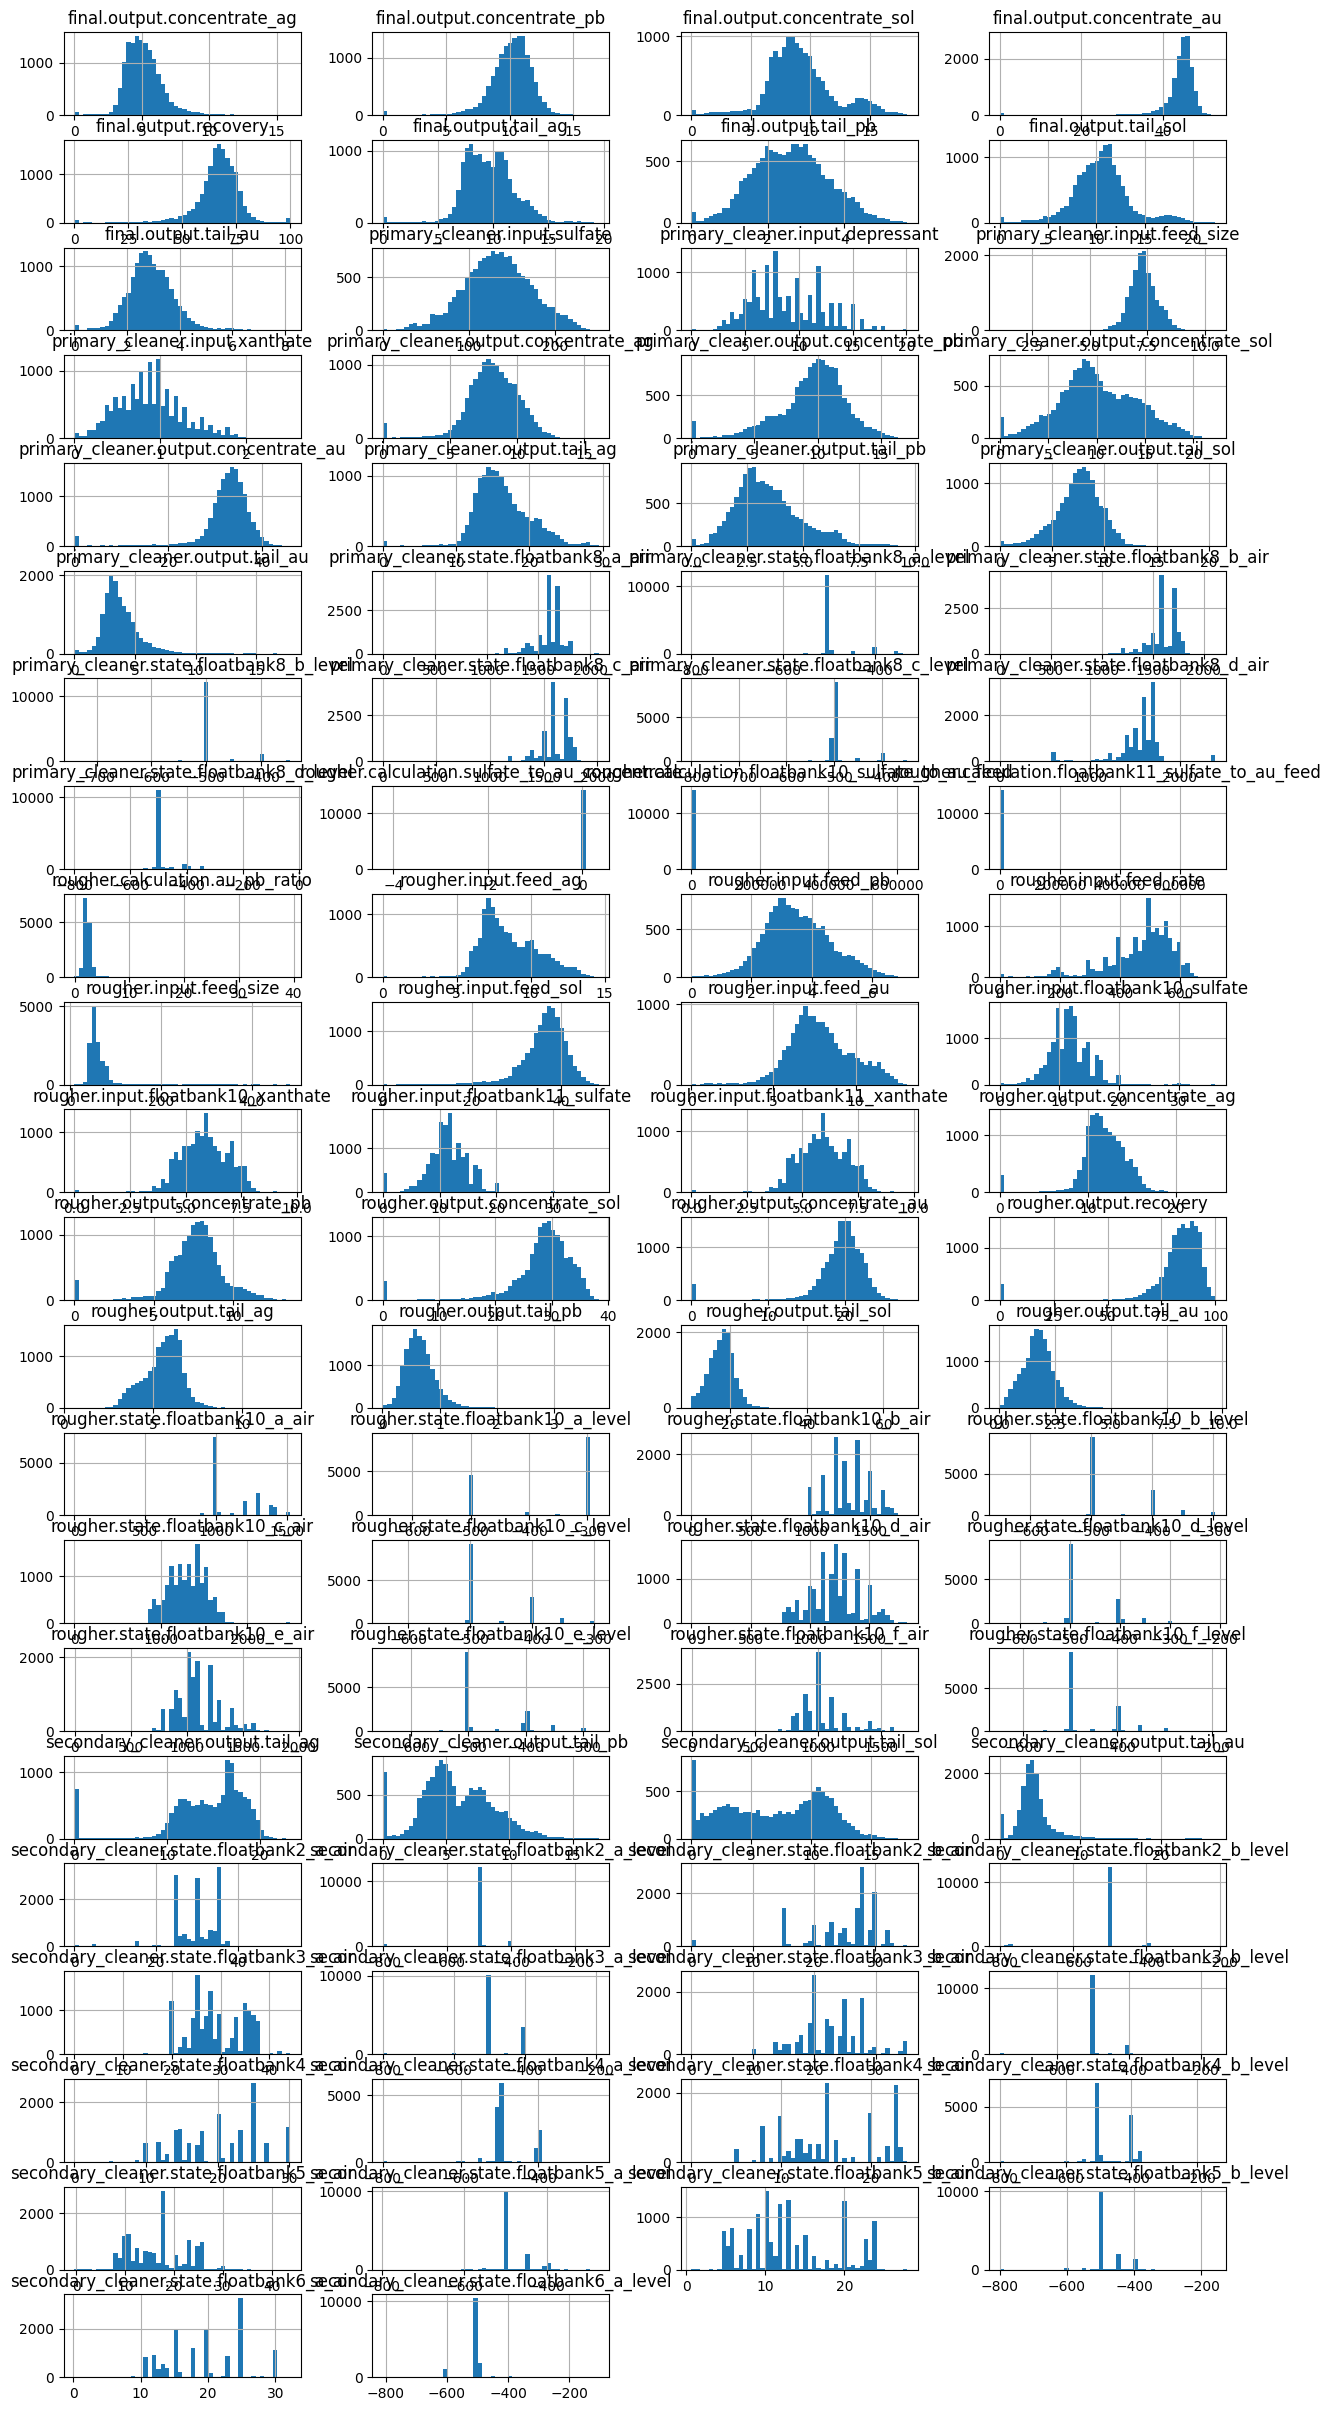

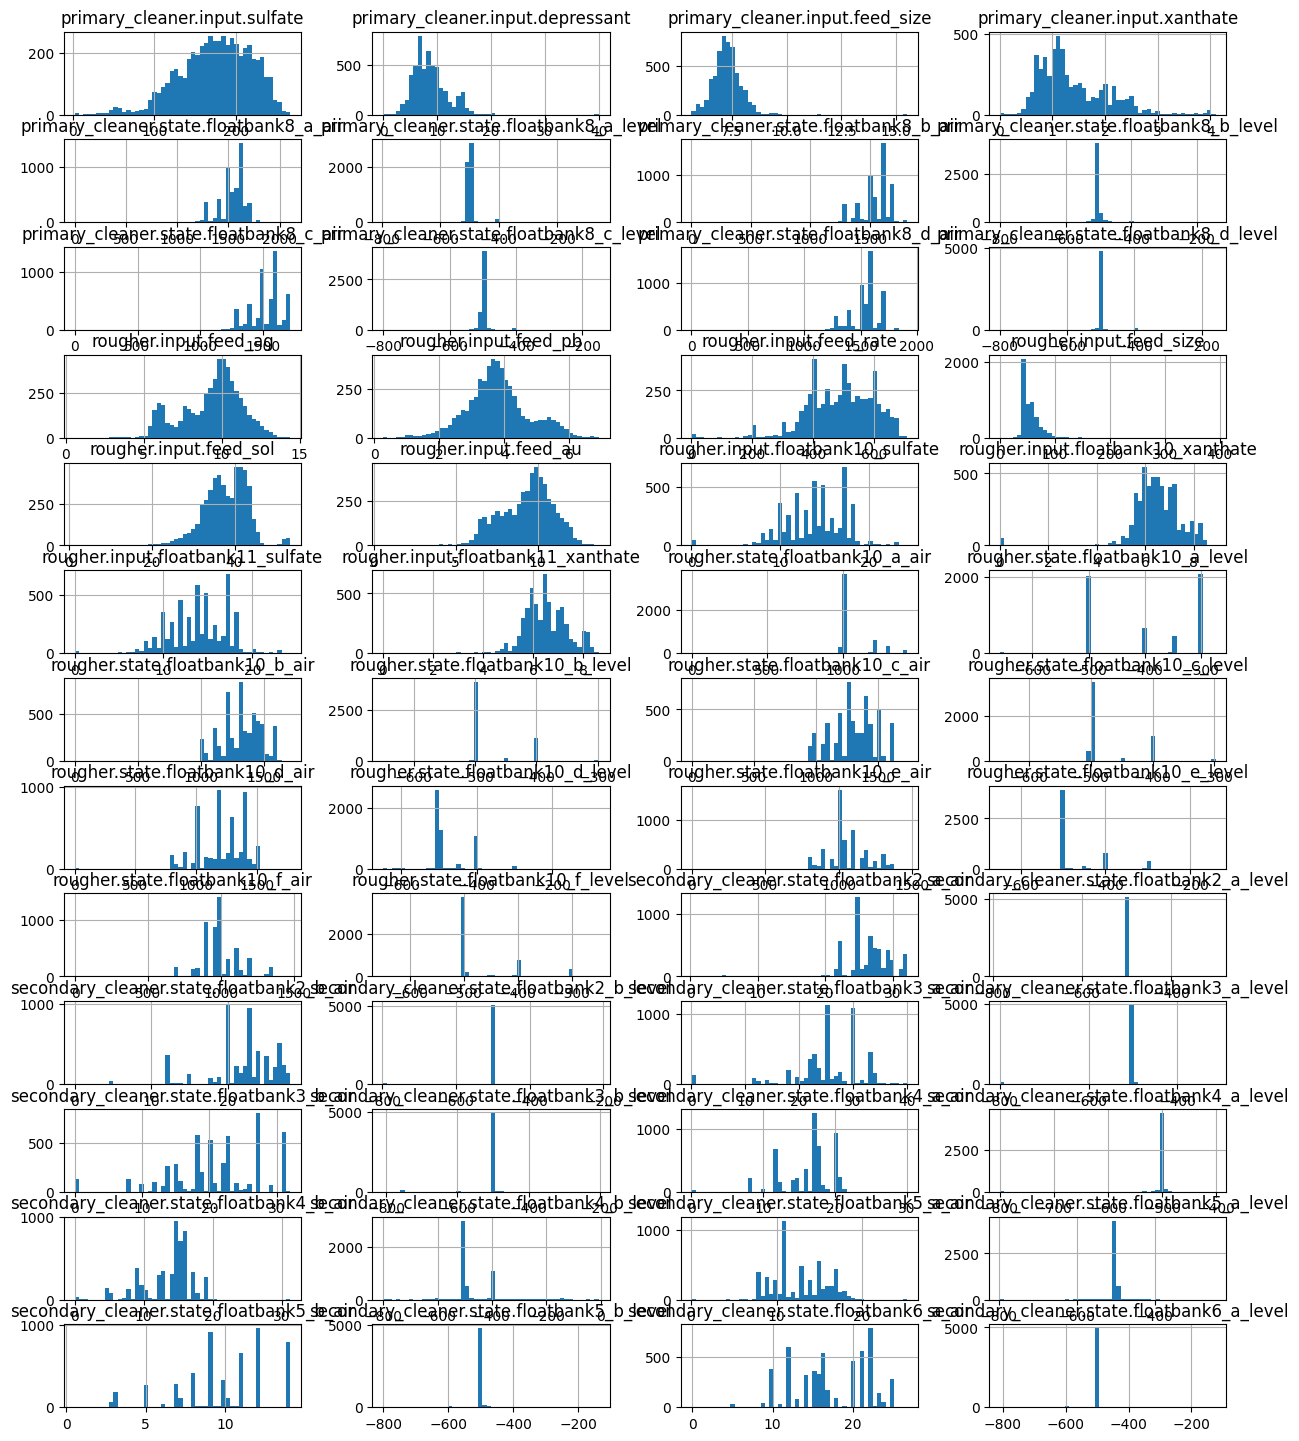

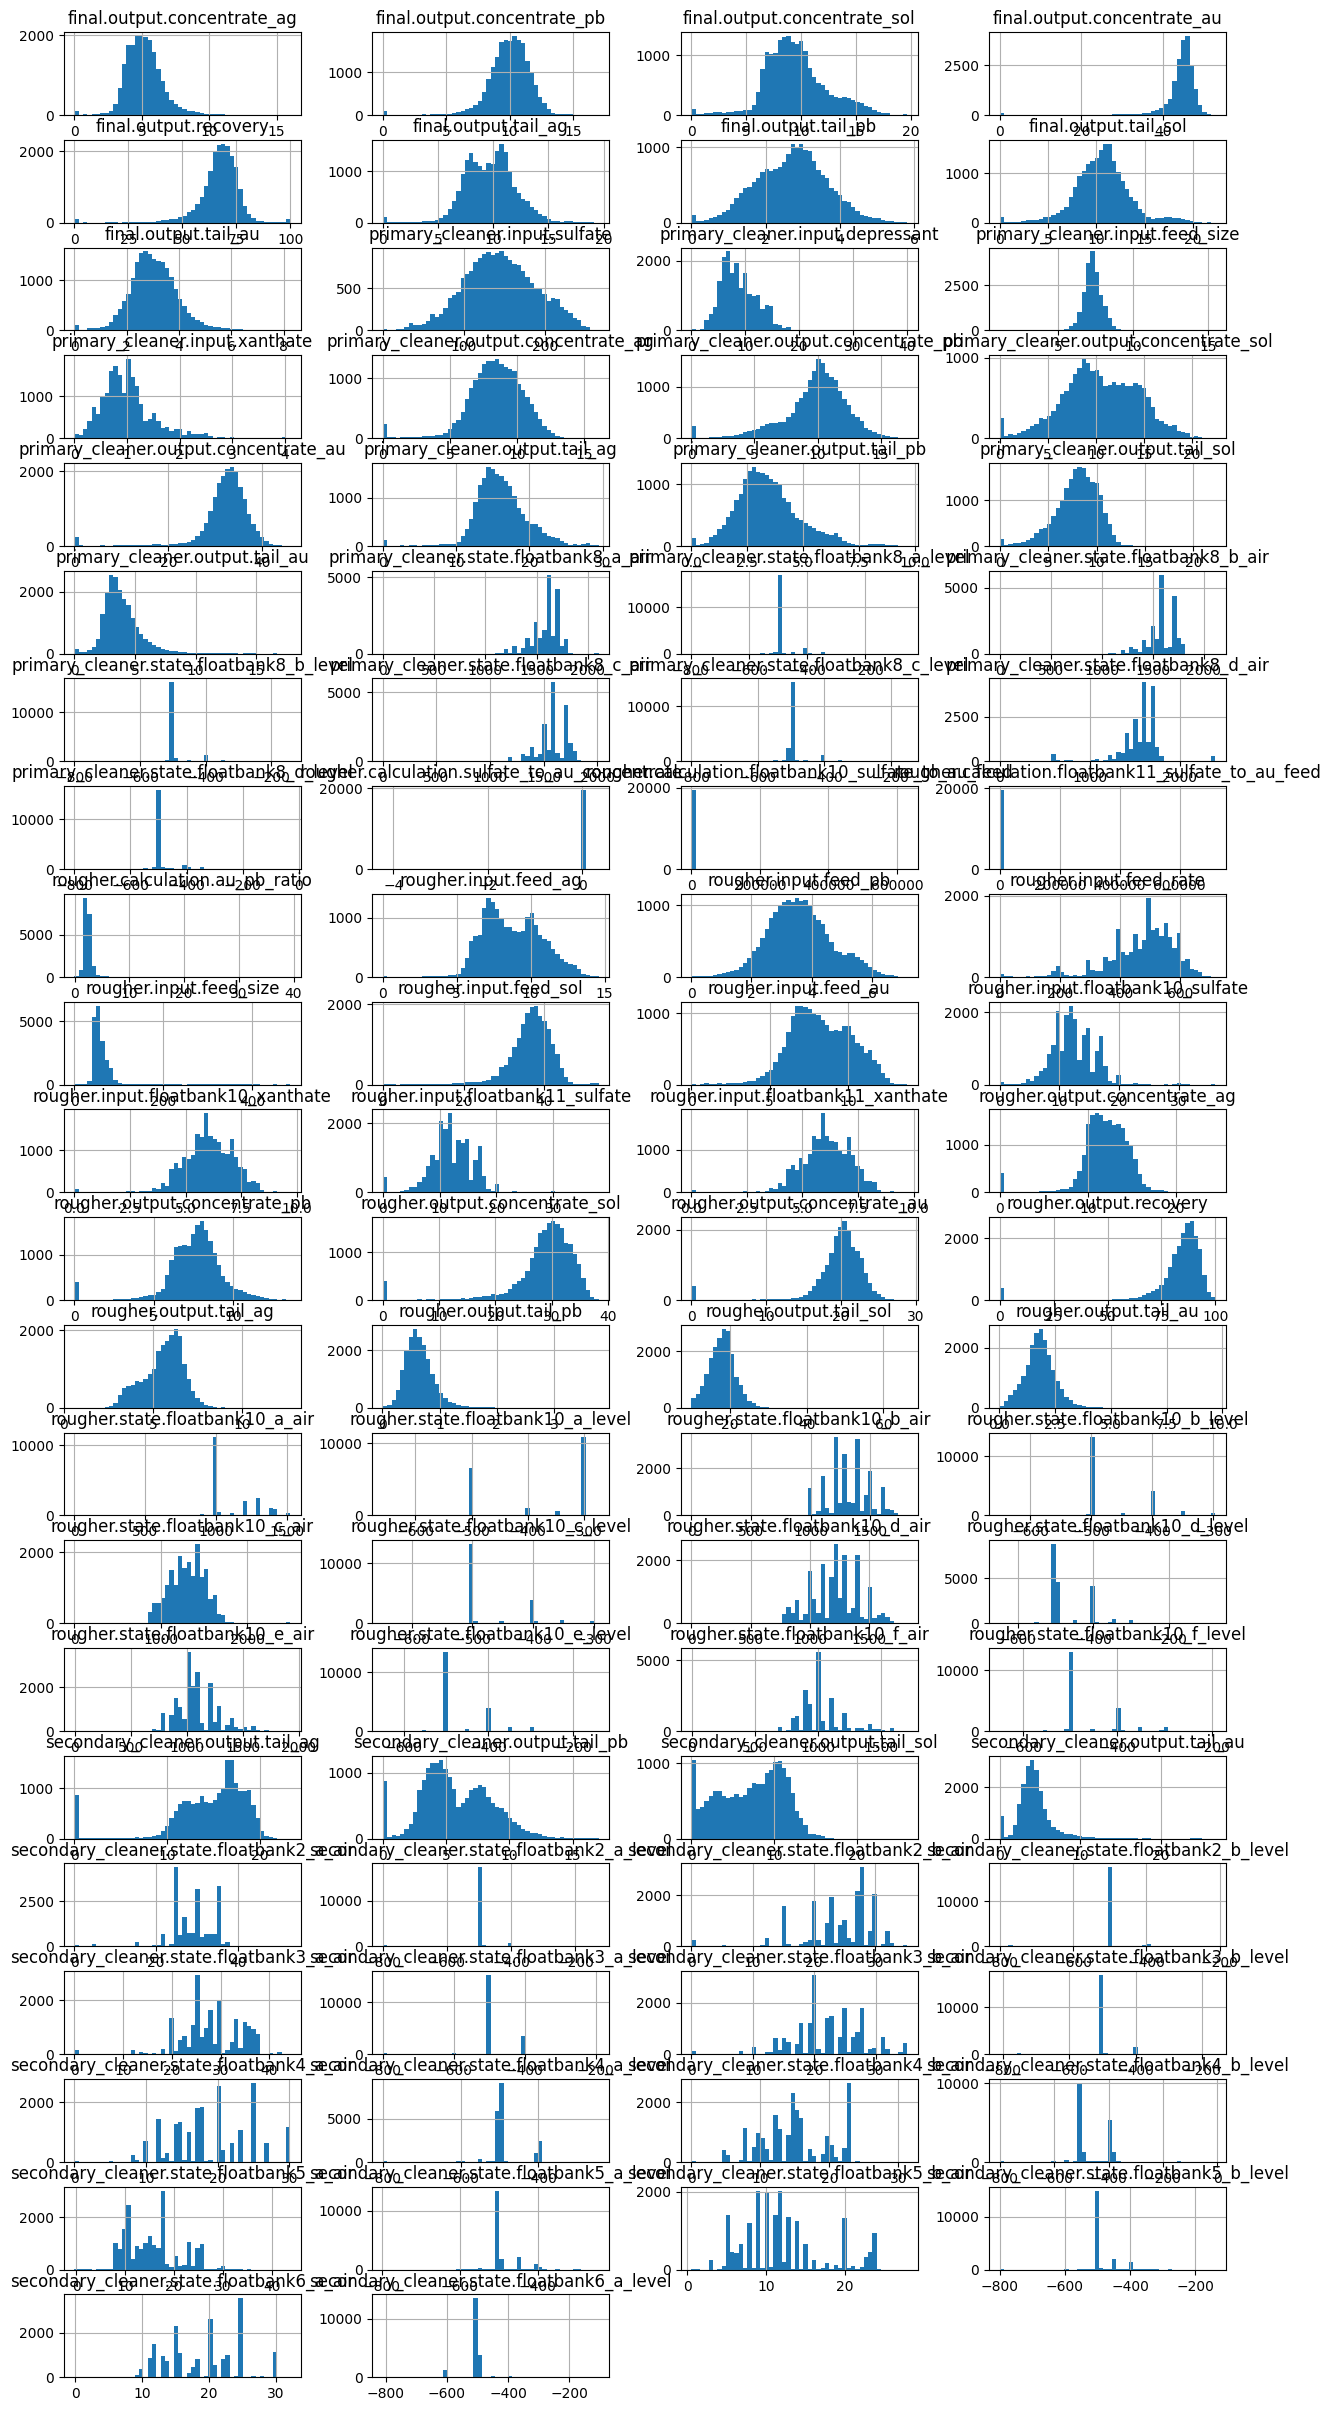

In [8]:
for df in df_list:
    show_main_info(df)

Дополнительно воспользуемся библиотекой sweetviz для просмотра отчёта о данных.

my_report = sv.analyze(data_train)
# my_report.show_html()
my_report.show_notebook()

my_report = sv.analyze(data_test)
my_report.show_notebook()

my_report = sv.analyze(data_full)
my_report.show_notebook()

Количество признаков в тестовой выборке не соответствует количеству признаков в обучающей и полной выборке.

В данных имеются пропуски.

Дубликатов нет.

В столбце date содержатся только уникальные данные, вероятно, дата и время внеснения данных\выполнения расчётов. Данный столбец можно использовать как ключ\индекс для выборок - воспользуемся этим.

In [9]:
for df in df_list:
    df.set_index('date', inplace=True)

In [10]:
data_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


### Вывод

Количество признаков в тестовой выборке не соответствует количеству признаков в обучающей и полной выборке.

В данных имеются пропуски.

Дубликатов нет.

Столбец даты мы преобразовали в индекс.

### 1.3. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдём MAE между нашими расчётами и значением признака.

In [11]:
C, F, T = data_train['rougher.output.concentrate_au'], data_train['rougher.input.feed_au'], data_train['rougher.output.tail_au']

data_train['rougher_recovery_calculated'] = C * (F - T)/(F * (C - T)) * 100

In [12]:
mae = mean_absolute_error(data_train['rougher.output.recovery'], data_train['rougher_recovery_calculated'])
print(f'MAE {mae}')

MAE 9.73512347450521e-15


Значение ошибки ничтожно мало.

Соответственно, данные совпадают и рассчитаны корректно.

Удалим столбец с расчитанными данными, он нам более не нужен.

In [13]:
data_train.drop(['rougher_recovery_calculated'], axis=1, inplace=True)

### Вывод

Расчёты выполнены верно

### 1.4. Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

Проверим, какие признаки отсутствуют в тестовой выборке.

In [14]:
target_features = ['rougher.output.recovery', 'final.output.recovery']

In [15]:
unavailable = []
for col in data_train.columns:
    if col not in data_test.columns and col not in target_features:
        unavailable.append(col)
unavailable

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'rougher.output.tail_au',
 'secondary_cleane

### Вывод

В тестовой выборке отсутствуют параметры продукта, расчётные характеристики и целевой признак.

Из-за отсутствия целевого признака, мы не сможем использовать данную выборку для проверки модели.

Возможно, в восстановлении этих данных нам поможет информация из полной выборки.

### 1.5. Проведём предобработку данных.

Удалим из train выборки признаки, отсутствующие в test

In [16]:
data_train.drop(unavailable, axis=1, inplace=True)

Заполним пропущенные значения соседними значениями, т.к. все измерения являются последовательными во времени.

In [17]:
for df in df_list:
    df.fillna(method='ffill', inplace=True)
    print(f'Пропущенные значения {df.isna().sum().sum()}')

Пропущенные значения 0
Пропущенные значения 0
Пропущенные значения 0


Мы заполнили все пропуски и можем приступать к анализу.

### Вывод

Удалили из train выборки признаки, отсутствующие в test.

Заполнили отсутствующие значения соседними.

## Вывод

Количество признаков в тестовой выборке не соответствует количеству признаков в обучающей и полной выборке.

В данных имеются пропуски.

Дубликатов нет.

Столбец даты мы преобразовали в индекс.

Проверили расчёты эффективности. Расчёты выполнены верно.

В тестовой выборке отсутствуют параметры продукта, расчётные характеристики и целевой признак.

Из-за отсутствия целевого признака, мы не сможем использовать данную выборку для проверки модели.

Восстановим их из полной выборки.

Удалили из train выборки признаки, отсутствующие в test.

Заполнили отсутствующие значения соседними.

## 2. Проанализируем данные

### 2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [18]:
metal_list=['ag', 'au', 'pb']

In [19]:
stage_list = ['rougher', 'primary_cleaner', 'secondary_cleaner', 'final']

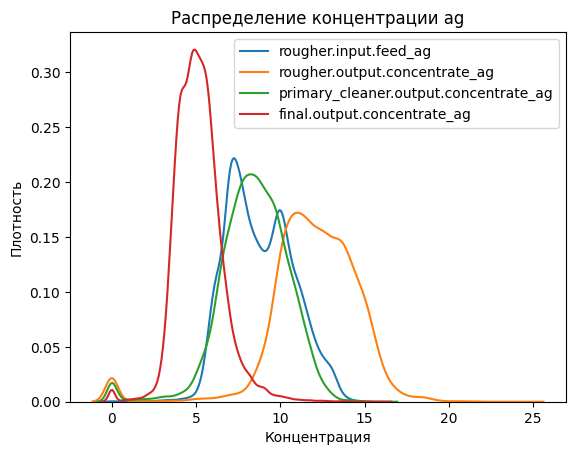

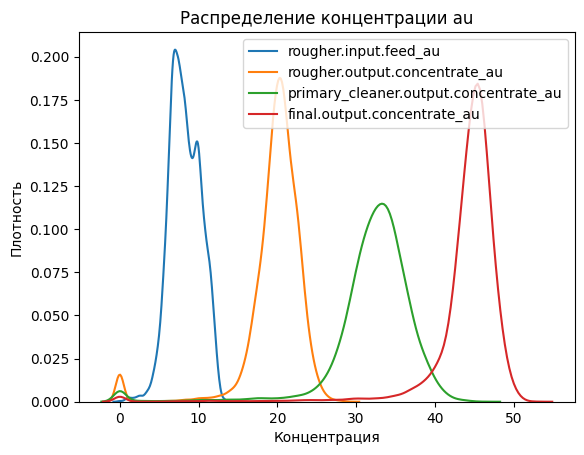

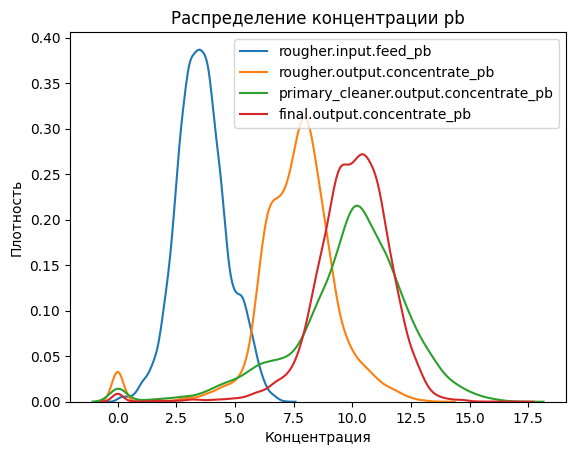

In [20]:
for metal in metal_list:
    x_upper = 0
    for stage in stage_list:
        for col in data_full.columns:
            if col.startswith(stage) and col.endswith(metal) and not col.endswith('tail_'+metal):
                # data_full[col].hist(bins=100, alpha=.6, label=col)
                sns.kdeplot(data_full[col], label=col)
                if x_upper < data_full[col].max():
                    x_upper = data_full[col].max()
    # plt.xlim([0, x_upper])
    # plt.ylim([0, 2250])

    plt.xlabel('Концентрация')
    plt.ylabel('Плотность')

    plt.legend(loc='upper right')

    plt.title('Распределение концентрации ' + metal)
    plt.show()

### Вывод

Концентрация серебра уменьшаетсчя с каждым этапом.

Концентрация золота увеличивается.

Концентрация свинца после флотации увеличивается, а затем сохраняется на одном уровне.

### 2.2.  Сравним распределение размеров гранул сырья на обучающей и тестовой выборках.

Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

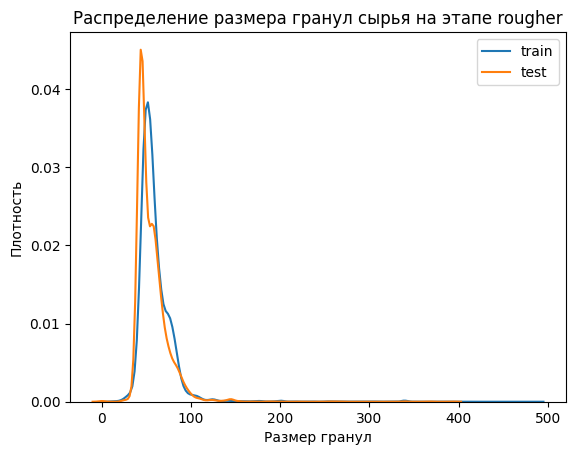

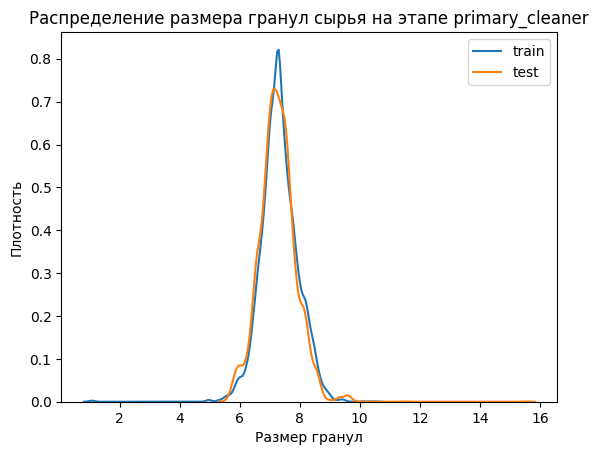

In [21]:
for stage in stage_list:
    x_upper = 0
    for col in data_train.columns:
        if col.startswith(stage) and col.endswith('feed_size'):
            sns.kdeplot(data_train[col], label='train')
            sns.kdeplot(data_test[col], label='test')
            # data_train[col].hist(bins=100, alpha=.6, label='train')
            # data_test[col].hist(bins=100, alpha=.6, label='test')
            if x_upper < data_test[col].max():
                    x_upper = data_test[col].max()
            if x_upper < data_train[col].max():
                    x_upper = data_train[col].max()
            # plt.xlim([0, x_upper])
            # plt.ylim([0, 2700])
            plt.xlabel('Размер гранул')
            plt.ylabel('Плотность')
            plt.title('Распределение размера гранул сырья на этапе ' + stage)
            plt.legend(loc='upper right')
            plt.show()

### Вывод

Распределение гранул сырья в обеих выборках конечно отличается, но визуально имеется сходство.

Т.к. обе выборки являются подвыборками из одной общей, то будем считать эти отличия незначительными.

### 2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

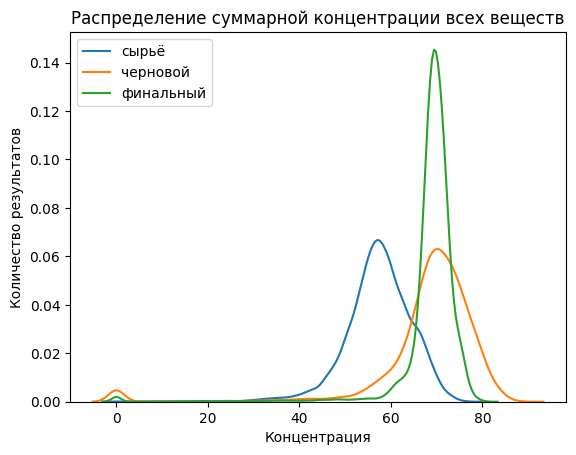

In [22]:
x_upper = 0
columns_concentrate=[]
stage_dict = {'rougher.input.feed_':'сырьё', 'rougher.output.concentrate_': 'черновой', 'final.output.concentrate_':'финальный'}
substance = ['ag', 'au', 'pb', 'sol']
for stage in stage_dict:
    for col in data_full.columns:
        for i in range(len(substance)):
            if col.startswith(stage) and substance[i] in col:
                columns_concentrate.append(col)

    if len(columns_concentrate) != 0:
        sns.kdeplot(data_full[columns_concentrate].sum(axis=1), label=stage_dict[stage])
        # data_full[columns_concentrate].sum(axis=1).hist(bins=100, alpha=.5, label=stage_dict[stage])
        columns_concentrate=[]

# plt.xlim([0, 100])
# plt.ylim([0, 2700])

plt.xlabel('Концентрация')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left')

plt.title('Распределение суммарной концентрации всех веществ')
plt.show()

### Вывод

В процессе обогащения сырья суммарная концентрация веществ повышается, а к финальной стадии диапазон разброса концентрации сужается.

Также обнаружена аномалия в суммарной концентрации чернового и финального концентрата.

Удалим выбросы в столбцах rougher.output.concentrate и final.output.concentrate

Избавимся от выбросов с помощью квантилей

In [23]:
data_train.shape

(14149, 54)

In [24]:
def clip_anomaly_values(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # lower=Q1-1.5*IQR
    lower = Q1 - 1.5 * IQR
    # upper=Q3+1.5*IQR
    upper = Q3 + 1.5 * IQR

    # df[column].clip(
    #     lower=lower,
    #     upper=upper,
    #     inplace=True
    # )
    
    df_mod = df[(df[column] >= lower) & (df[column] <= upper)]
    return df_mod

In [25]:
substance = ['ag', 'au', 'pb', 'sol']
for col in data_train.columns:
    for i in range(len(substance)):
        if substance[i] in col:
            data_train = clip_anomaly_values(data_train, col)

In [26]:
data_train.shape

(13441, 54)

## Вывод

Концентрация серебра уменьшается с каждым этапом.

Концентрация золота увеличивается.

Концентрация свинца после флотации увеличивается, а затем сохраняется на одном уровне.

Распределение гранул сырья в обеих выборках конечно отличается, но визуально имеется сходство.

На этапе флотации распределение тестовой выборки имеет некоторые отличия, а на этапе очистки распределение уже становится похожим.

Т.к. обе выборки являются подвыборками из одной общей, то будем считать эти отличия незначительными.

В процессе обогащения сырья суммарная концентрация веществ повышается, а к финальной стадии диапазон разброса концентрации сужается.

## 3. Построим модель

### 3.1. Напишем функцию для вычисления итоговой sMAPE.

In [27]:
def calc_sMAPE(target, predictions):
    return 1/len(target)*(abs(target - predictions) / ((abs(target) + abs(predictions))/2)).sum()*100

In [28]:
def sMAPE(target, predictions):
    rougher_target = target['rougher.output.recovery']
    final_target = target['final.output.recovery']
    rougher_predictions = predictions[:, 0]
    final_predictions = predictions[:, 1]
    
    return .25 * calc_sMAPE(rougher_target, rougher_predictions) + .75 * calc_sMAPE (final_target, final_predictions)

### 3.2. Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.

Выделим целевой признак для каждой выборки 

In [29]:
target_columns = ['rougher.output.recovery', 'final.output.recovery']
data_test[target_columns] = data_full[target_columns]
features_train = data_train.drop(target_columns, axis=1)
target_train = data_train[target_columns]
features_test = data_test.drop(target_columns, axis=1)
target_test = data_test[target_columns]

In [30]:
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(13441, 52)
(13441, 2)
(5290, 52)
(5290, 2)


Выполним масштабирование признаков

In [31]:
scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

Рассмотрим три модели:
- Дерево
- Случайный лес
- Линейную регрессию

А также проверим их качество в сравнении с моделью Dummy.

In [32]:
models = {DecisionTreeRegressor(random_state=RANDOM_STATE) : [{'max_depth': range(3,11,2),\
                                                               'max_features': range(14,19,2)}],
          RandomForestRegressor(random_state=RANDOM_STATE) : [{'n_estimators': range(14,19,2),\
                                                               'max_depth': range(3,11,2),\
                                                               'max_features': range(8,19,2)}],
          LinearRegression() : {'fit_intercept':[True, False]},
         }

Воспользуемся smape_scorer для создания метрики оценки моделей.

In [33]:
sMAPE_scorer = make_scorer(sMAPE, greater_is_better=False)

С помощью GridSearchCV найдём параметры наилучшей модели дерева.

In [34]:
def GridSearch(model, params_grid):
    grid_search = GridSearchCV(model, params_grid, scoring=sMAPE_scorer, n_jobs=-1, cv=5)
    grid_search.fit(features_train, target_train);
    print(f'Параметры модели\n{grid_search.best_estimator_}')
    print(f'Лучшая оценка модели sMAPE {abs(grid_search.best_score_)}')
    print('-----------------------------------------------------------------------')
    
    return grid_search.best_estimator_, abs(grid_search.best_score_)

In [35]:
best_sMAPE = 10000
best_model = None
for model in models:
    model_GS, sMAPE_GS = GridSearch(model, models[model])
    if sMAPE_GS < best_sMAPE:
        best_sMAPE = sMAPE_GS
        best_model = model_GS

print(f'\n\nНаилучшая модель: \n{best_model}')
print(f'Лучшая оценка модели {best_sMAPE}')

Параметры модели
DecisionTreeRegressor(max_depth=3, max_features=14, random_state=42)
Лучшая оценка модели sMAPE 10.322738675396465
-----------------------------------------------------------------------
Параметры модели
RandomForestRegressor(max_depth=5, max_features=8, n_estimators=16,
                      random_state=42)
Лучшая оценка модели sMAPE 9.576505478680312
-----------------------------------------------------------------------
Параметры модели
LinearRegression()
Лучшая оценка модели sMAPE 11.666505817411966
-----------------------------------------------------------------------


Наилучшая модель: 
RandomForestRegressor(max_depth=5, max_features=8, n_estimators=16,
                      random_state=42)
Лучшая оценка модели 9.576505478680312


### Вывод

Наилучшие показатели получили у модели Случайного леса

### Проверим лучшую модель на тестовой выборке

In [36]:
model = RandomForestRegressor(max_depth=5,\
                              max_features=8,\
                              n_estimators=16,\
                              random_state=RANDOM_STATE\
                             )
model.fit(features_train, target_train);
sMAPE_test = sMAPE(target_test, model.predict(features_test))
print(f'sMAPE модели на тестовой выборке: {sMAPE_test}')

sMAPE модели на тестовой выборке: 8.834966748118541


Результата на тестовой выборке ещё улучшился.

### 3.3. Проверка Dummy моделью

Вычислим итоговый sMAPE с помощью модели Dummy и стратегии выбора среднего значения.

In [37]:
dummy = DummyRegressor(strategy='mean')

In [38]:
dummy.fit(features_train, target_train);

In [39]:
print(f'sMAPE Dummy модели на тестовой выборке:\n{sMAPE(target_test, dummy.predict(features_test))}')

sMAPE Dummy модели на тестовой выборке:
10.011540508567817


### Вывод

sMAPE Dummy модели оказался хуже нашей лучшей модели Случайного леса, что подтверждает правильность нашего выбора лучшей модели.

## Вывод

Мы ознакомились с данными, исправили пропуски, удалили лишние признаки из обучающей выборкиб заполнили пропущенные значения соседними и подотовили данные к анализу.

Проверили расчёты эффективности, расчёты выполнены верно.

Удалили из обучающей выборки признаки, отсутствующие в тестовой.

В тестовой выборке отсутствал целевой признак, его мы перенесли из полной выборки.

Изучили изменение концентрации веществ на разных этапах, а также изучили распредеделение размера гранул сырья.

Построили три модели, из которых оказалась лучшей модель Случайного леса. Её адекватность мы проверили сравнив с Dummy моделью средних значений.